# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections

*This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please exercise caution when interpreting the code or results.*

## Overview

This notebook explores Dandiset 001195, which includes data supporting the publication "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State." The dataset includes in vivo calcium imaging, behavior videos, and ex vivo patch-clamp electrophysiology recordings.

[Dandiset 001195 Link](https://dandiarchive.org/dandiset/001195)

### Summary

- Load and analyze data from the DANDI Archive using the DANDI API.
- Visualize electrophysiological data from NWB files.
- Discuss findings and future directions.

## Required Packages
The following packages are required:
- dandi
- pynwb
- h5py
- remfile
- matplotlib

## Loading the Dandiset

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001195")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\\nFound {len(assets)} assets in the dataset")
print("\\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733
\nFound 230 assets in the dataset
\nFirst 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb


## Loading an NWB File

Let's load one of the NWB files to explore its contents. We're using the file at the following URL:

[NWB File URL](https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/)

In [2]:
import pynwb
import h5py
import remfile

# Load NWB file
url = "https://api.dandiarchive.org/api/assets/a243dde4-c270-42a9-8550-025f5ffcd5a7/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display NWB metadata without excessive output
print("NWB Metadata:")
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")

NWB Metadata:
Session Description: episodic stimulation
Identifier: a18b081c-3b63-45df-b702-fc3640aef3de
Session Start Time: 2015-03-24 13:41:14-07:00
Experimenter: ('Matthews, Gillian',)


## Visualizing Data

Below is a plot showing the Current Clamp Response data from the NWB file.

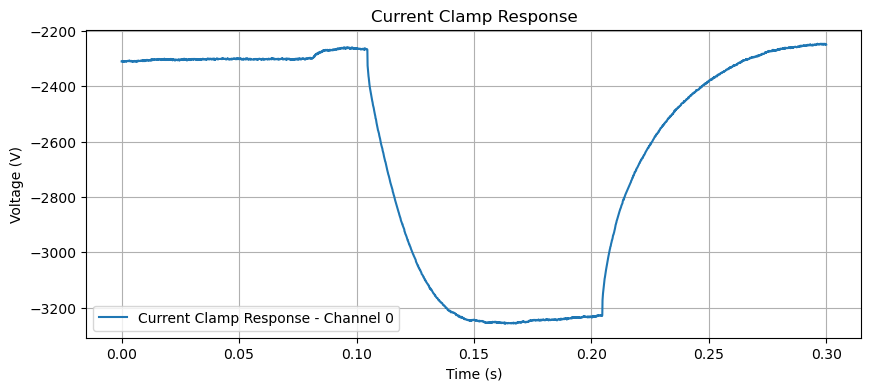

In [3]:
import matplotlib.pyplot as plt
import numpy as np

cc_series = nwb.acquisition["current_clamp-response-01-ch-0"]
data = cc_series.data[:]
timestamps = np.arange(len(data)) / cc_series.rate

plt.figure(figsize=(10, 4))
plt.plot(timestamps, data, label="Current Clamp Response - Channel 0")
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Current Clamp Response')
plt.legend()
plt.grid(True)

## Conclusion and Future Directions

The dataset provides invaluable insights into the electrophysiology of dopamine neurons involved in loneliness-like states. Potential avenues for future analysis include exploring additional NWB files, integrating behavior videos, and extending analysis to calcium imaging data.